---

# Let's practice

Before you start working and playing with the different models that we have seen, we are going to download the dataset with which you are going to work, the titanic dataset, widely known and used in machine learning courses.

For this we are going to do the following:

```python
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic['data'], titanic['target']],
    columns= titanic['feature_names'] + ['target']
)
df_titanic = df_titanic.rename(columns={'target': 'survived'})
```

So using the same dataset (Titanic), you should train 4 models:

* Decision Tree
* SVM
* Random Forest
* Extra: XGBoost

And you should apply the following concepts:

* Train/Test Split.
* Feature engineering.
* GridSearch or RandomSearch with CV.
* Metrics.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from matplotlib import style
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic["data"], titanic["target"]],
    columns=titanic["feature_names"] + ["target"],
)
df_titanic = df_titanic.rename(columns={"target": "survived"})
df_titanic.head()

d:\AnyoneAI\environment\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.55,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781,151.55,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,151.55,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


## Exploration

**TODO:** We always have to explore our datasets, so this is not going to be the exception.

**The dataset contains the following columns:**

1. pclass: Passenger's class (1st, 2nd, or 3rd class)
2. name: Passenger's name
3. sex: Passenger's gender (male or female)
4. age: Passenger's age
5. sibsp: Number of siblings/spouses aboard
6. parch: Number of parents/children aboard
7. ticket: Ticket number
8. fare: Fare paid by the passenger
9. cabin: Cabin number where the passenger stayed
10. embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
11. boat: Lifeboat number (if survived)
12. body: Body number (if not survived and body was recovered)
13. home.dest: Home or destination of the passenger
14. survived: Survival status (1 = survived, 0 = not survived)

In [4]:
# Check for missing values
print(df_titanic.isnull().sum())

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64


In [5]:
# We display basic information about the dataset
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   object
 1   name       1309 non-null   object
 2   sex        1309 non-null   object
 3   age        1046 non-null   object
 4   sibsp      1309 non-null   object
 5   parch      1309 non-null   object
 6   ticket     1309 non-null   object
 7   fare       1308 non-null   object
 8   cabin      295 non-null    object
 9   embarked   1307 non-null   object
 10  boat       486 non-null    object
 11  body       121 non-null    object
 12  home.dest  745 non-null    object
 13  survived   1309 non-null   object
dtypes: object(14)
memory usage: 143.3+ KB
None


It looks like the data types for some columns are currently listed as object instead of the appropriate data types. This could lead to issues when performing calculations and visualizations. Let's address this issue by converting the columns to their appropriate data types and then we proceed with the analysis. 

In [6]:
numeric_cols = ["pclass", "age", "sibsp", "parch", "fare", "survived"]
for col in numeric_cols:
    df_titanic[col] = pd.to_numeric(df_titanic[col], errors="coerce")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   name       1309 non-null   object 
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   float64
 5   parch      1309 non-null   float64
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    object 
 12  home.dest  745 non-null    object 
 13  survived   1309 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 143.3+ KB


In [7]:
# Summary statistics
df_titanic.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [11]:
# Gender and Survival
gender_survival = df_titanic.groupby("sex")["survived"].mean()
print(gender_survival)

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


In [12]:
# Class and Survival
class_survival = df_titanic.groupby("pclass")["survived"].mean()
print(class_survival)

pclass
1.0    0.619195
2.0    0.429603
3.0    0.255289
Name: survived, dtype: float64


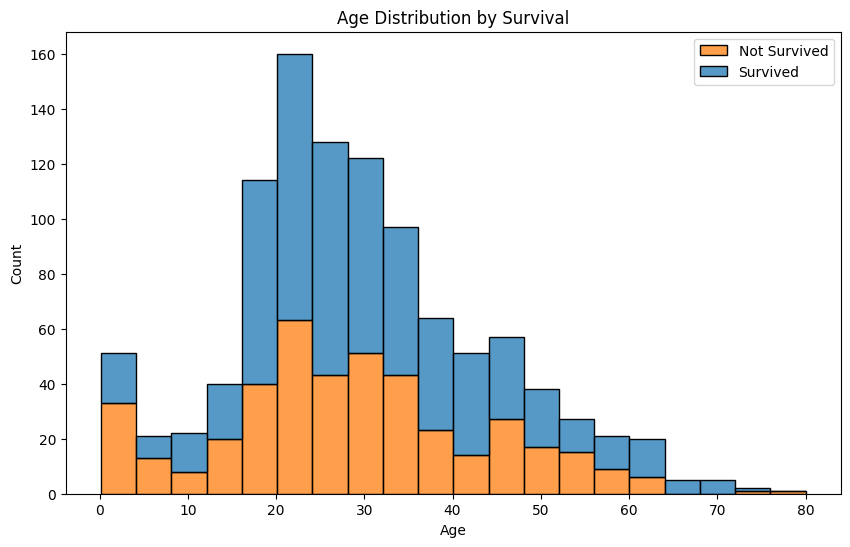

In [13]:
# Age and Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic, x="age", hue="survived", multiple="stack", bins=20)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()

In [14]:
# Family Size
df_titanic["family_size"] = df_titanic["sibsp"] + df_titanic["parch"]
family_survival = df_titanic.groupby("family_size")["survived"].mean()
print(family_survival)

family_size
0.0     0.302532
1.0     0.536170
2.0     0.566038
3.0     0.697674
4.0     0.272727
5.0     0.200000
6.0     0.250000
7.0     0.000000
10.0    0.000000
Name: survived, dtype: float64


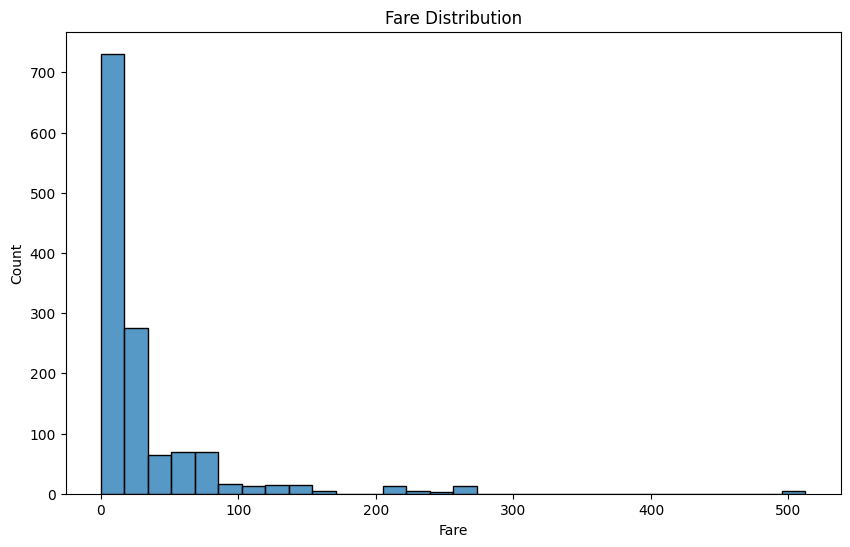

In [15]:
# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic, x="fare", bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

In [16]:
# Port of Embarkation
embarked_counts = df_titanic["embarked"].value_counts()
print(embarked_counts)

embarked
S    914
C    270
Q    123
Name: count, dtype: int64


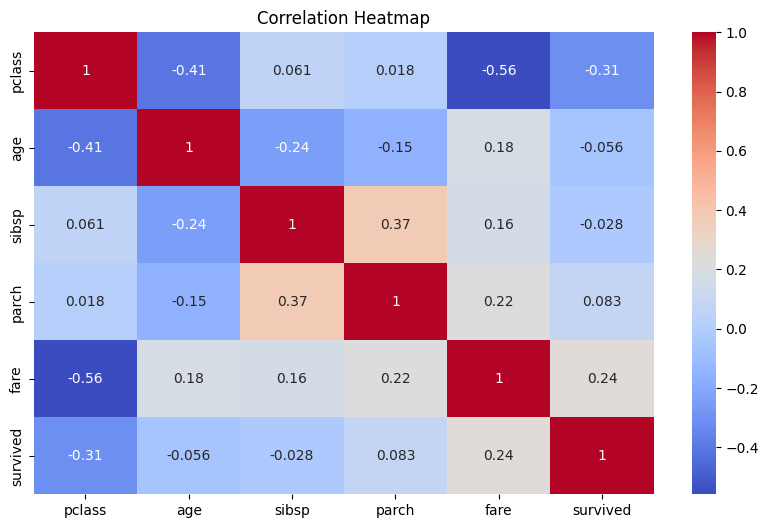

In [18]:
# Correlation heatmap (excluding non-numeric columns)
numeric_df = df_titanic[numeric_cols]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

**TODO:** 
    
* Fill in the missing values using any criteria that you consider appropriate.
* Eliminate those features that you consider necessary.
* Format categorical features, using Label and/or Hot encoder.

## Hyperparameter Optimization

**TODO:**

* Split the dataset into 80% train and 20% test.
* Using GridSearchCV or RandomSearchCV, tests different hyperparameter values for each model and chooses the best model from each of them.
* Evaluate the metrics of each model (accuracy, precision, recall, f1-score, roc-auc score) and choose the one with the best performance.
* Plot the precision and recall curves (tip: there is a sklearn method for this)
* Plot the ROC curve (tip: there is a sklearn method for it)

## Metrics

**TODO:**

* Evaluate the metrics of each model (accuracy, precision, recall, f1-score, roc-auc score) and choose the one with the best performance.
* Plot the precision and recall curves (tip: there is a sklearn method for this)
* Plot the ROC curve (tip: there is a sklearn method for it)

---

# Pipeline with ColumnTransformer and GridSearchCV

Only toy datasets like the __iris dataset__ will contain only numeric data, as we saw in the previous exercise, the __titanic dataset__ had a variety of different data types and not just numeric data.

By having different types of data we will not be able to apply the same transformations to each of them, instead we will have to apply different transformations depending on the type of data.

Next we are going to see an example of how to use __ColumnTransformer__ to simplify the application of these different transformations and above all to be able to insert it into a __Pipeline__.

Let’s use the toy dataset, which contains both numerical and categorical data, and apply:

* Normalize the Income column with MinMaxScaler()
* Encode Categorical Columns with OneHotEncoder()
* Group the Age column with binning.

In [ ]:
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=False)
df_titanic = pd.DataFrame(
    data=np.c_[titanic["data"], titanic["target"]],
    columns=titanic["feature_names"] + ["target"],
)
df_titanic = df_titanic.rename(columns={"target": "survived"})
df_titanic = df_titanic[["sex", "cabin", "age", "fare", "survived"]]

df_titanic["age"] = df_titanic["age"].astype("float64")
df_titanic["fare"] = df_titanic["fare"].astype("float64")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1309 non-null   object 
 1   cabin     295 non-null    object 
 2   age       1046 non-null   float64
 3   fare      1308 non-null   float64
 4   survived  1309 non-null   object 
dtypes: float64(2), object(3)
memory usage: 51.3+ KB


In [ ]:
df_titanic.isna().sum()

sex            0
cabin       1014
age          263
fare           1
survived       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Numeric features
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Categorical features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, ["age", "fare"]),
        ("cat", categorical_transformer, ["sex", "cabin"]),
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_titanic.drop("survived", axis=1),
    df_titanic.survived,
    test_size=0.2,
    random_state=0,
)

In [ ]:
my_pipe = Pipeline(
    [("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

my_params = {"classifier__max_depth": [2, 3, 4, 5, 6, 7, 8]}

grid = GridSearchCV(my_pipe, my_params, cv=5)
grid.fit(X_train, y_train)
score = grid.score(X_test, y_test)

print(f"Test score: {score}")
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Test score: 0.7977099236641222
Best parameters: {'classifier__max_depth': 5}
Best score: 0.7927044884939621


**TODO:**

Using __ColumnTransformer__ and __Pipeline__, build a pipeline where different transformations are applied to different types of data, you can use the Titanic dataset again. Also, do some research about the [FutureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) method.